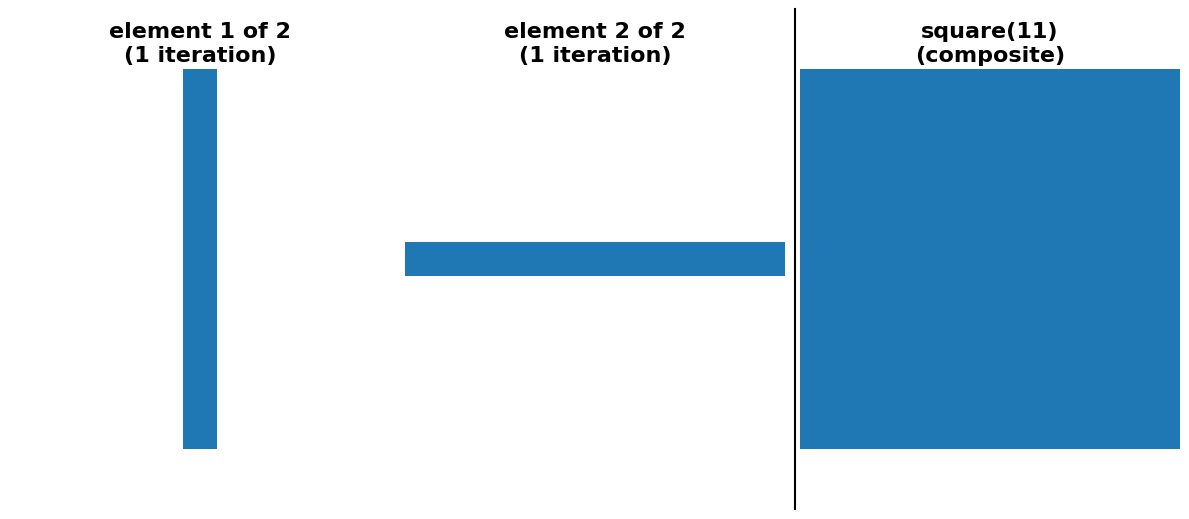

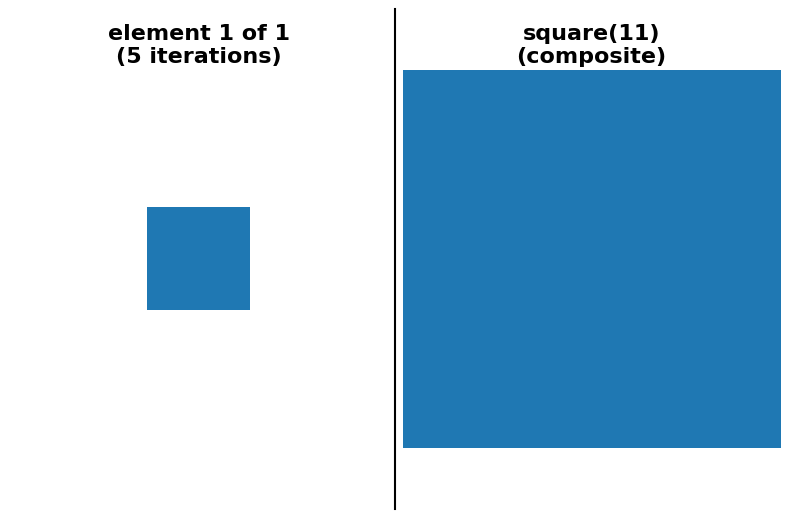

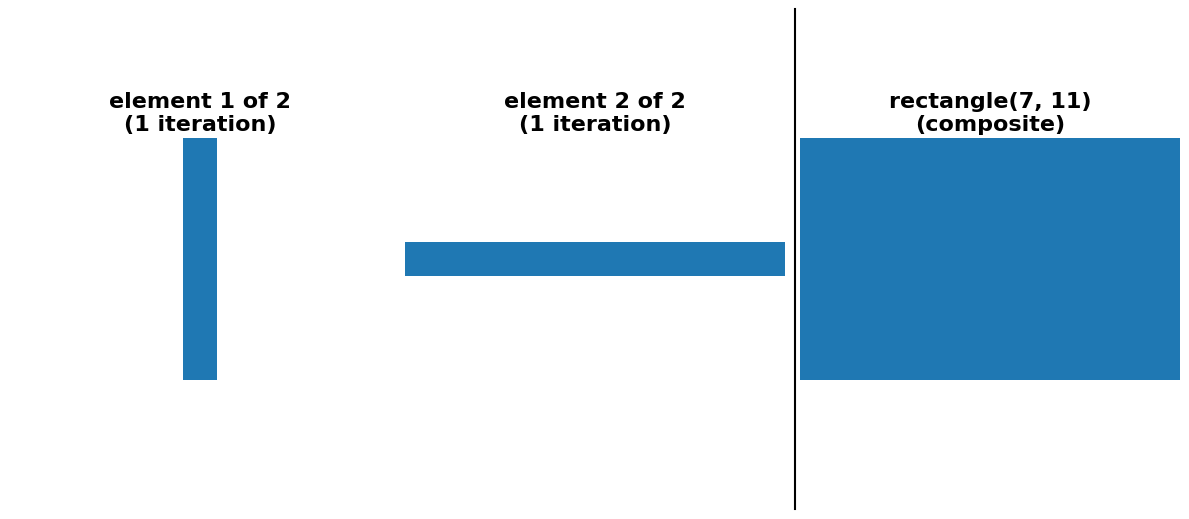

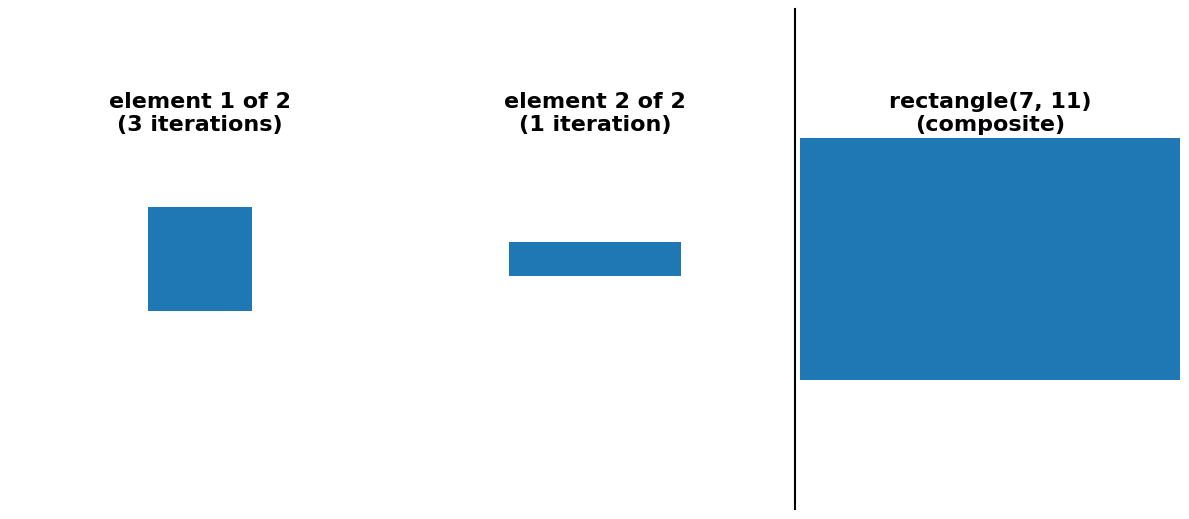

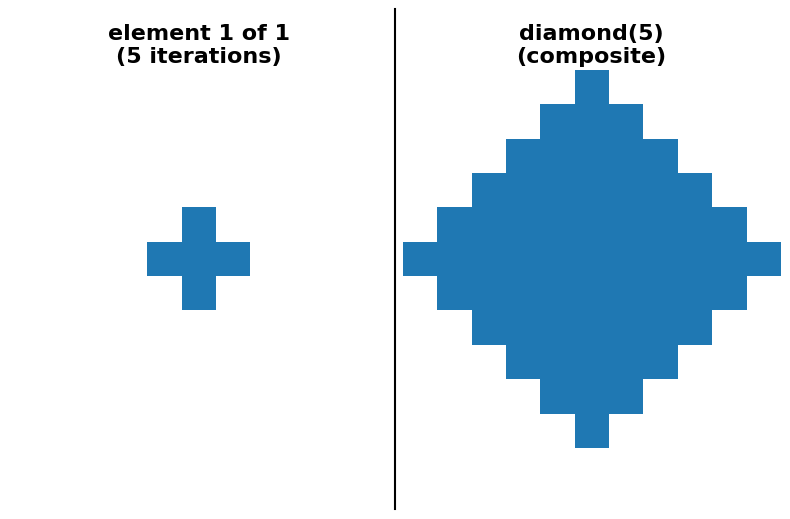

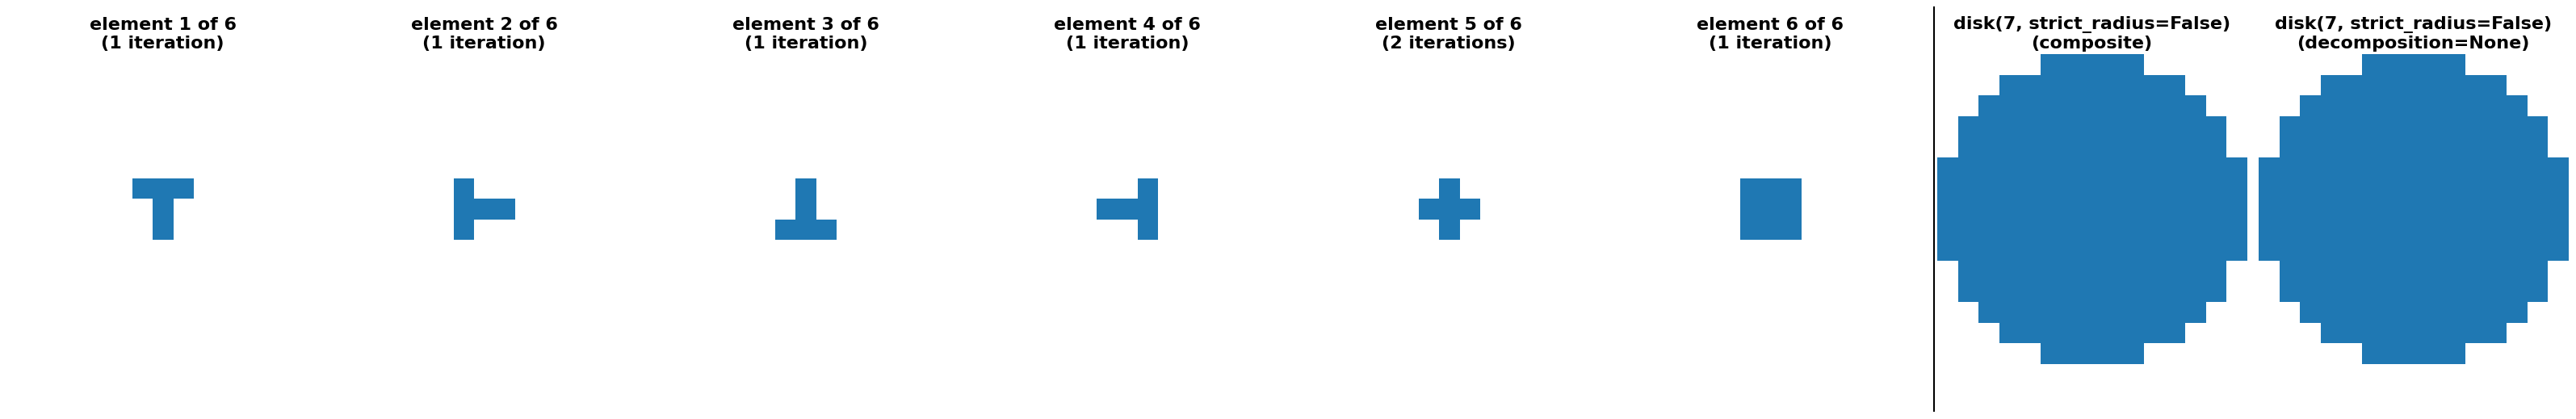

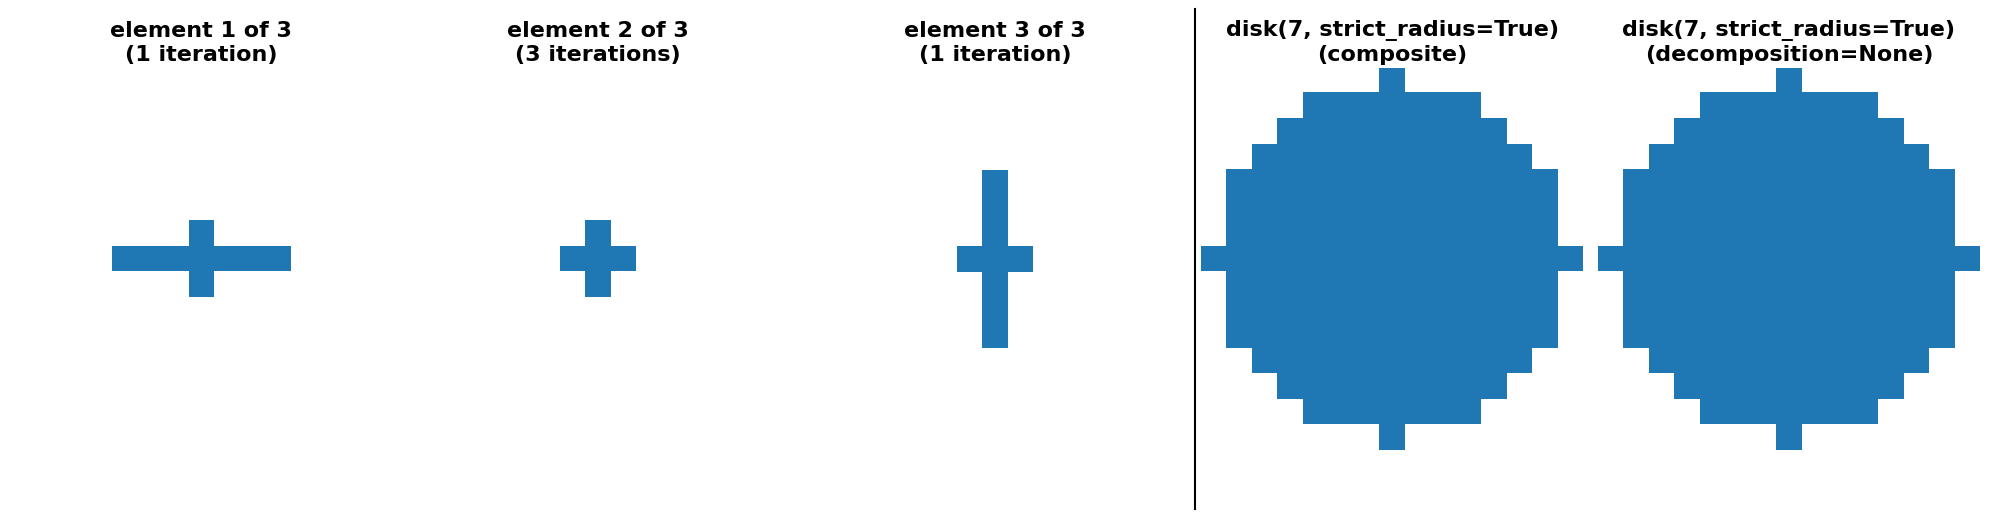

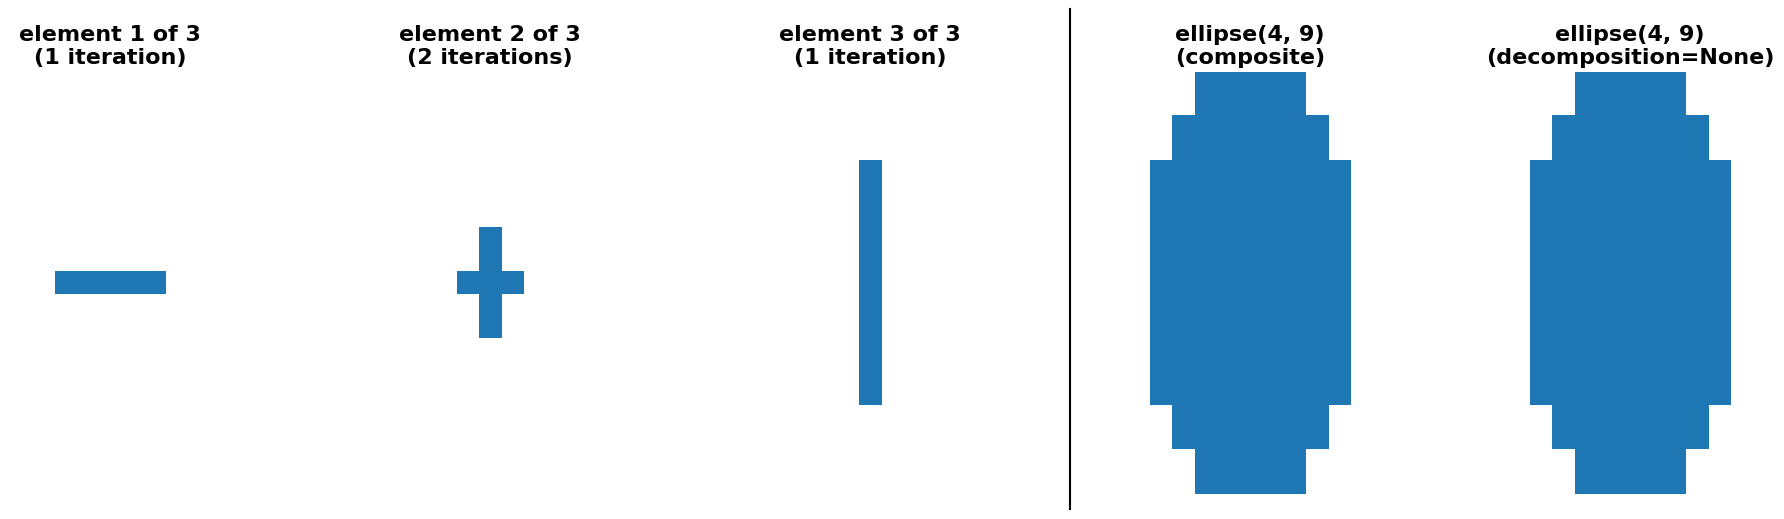

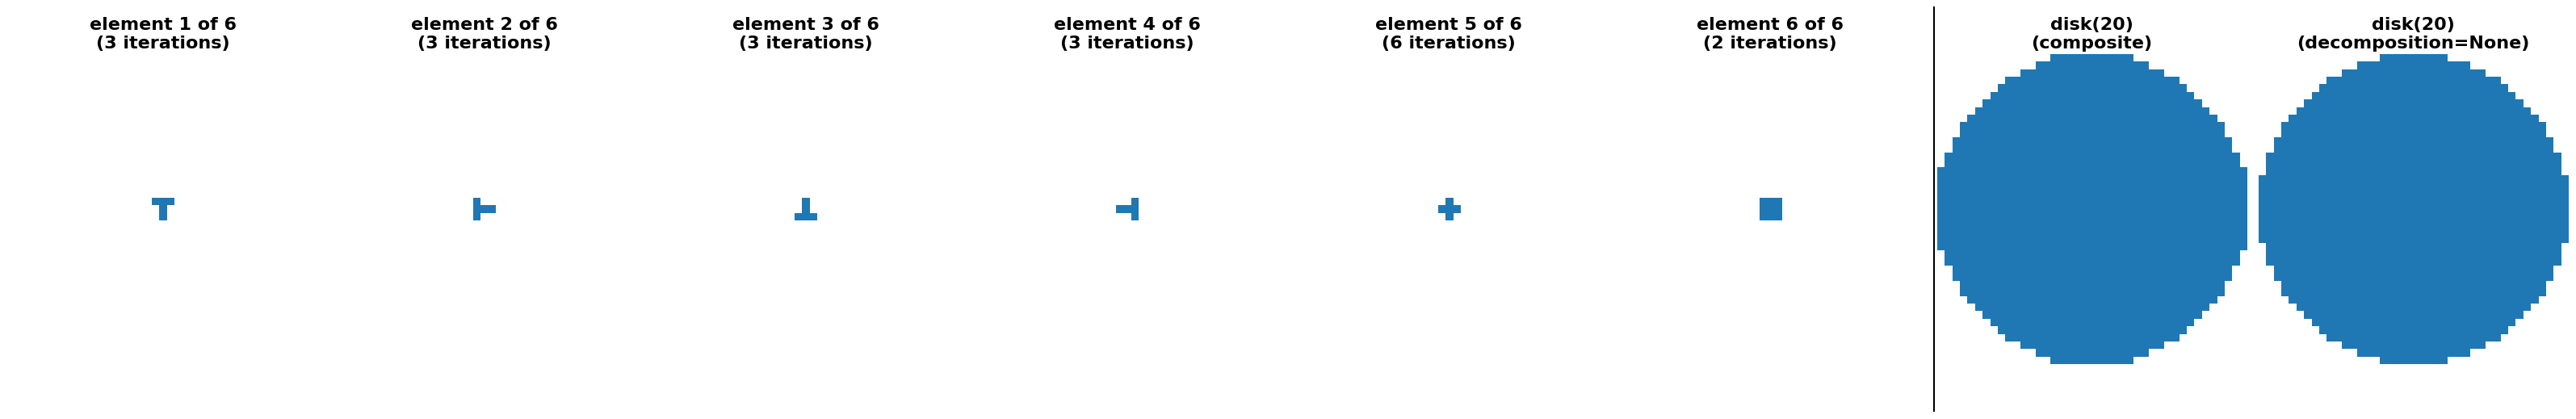

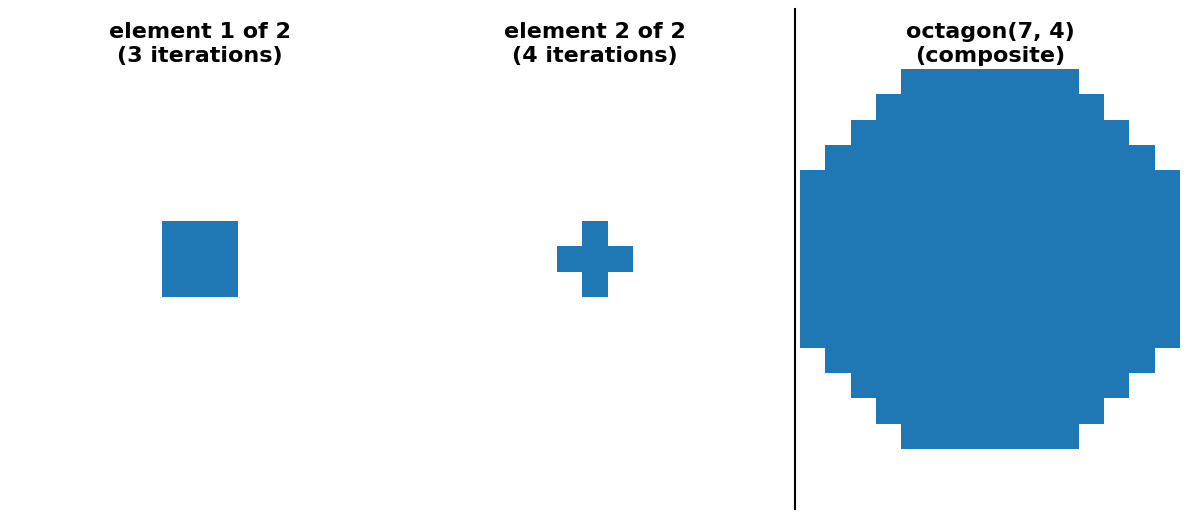

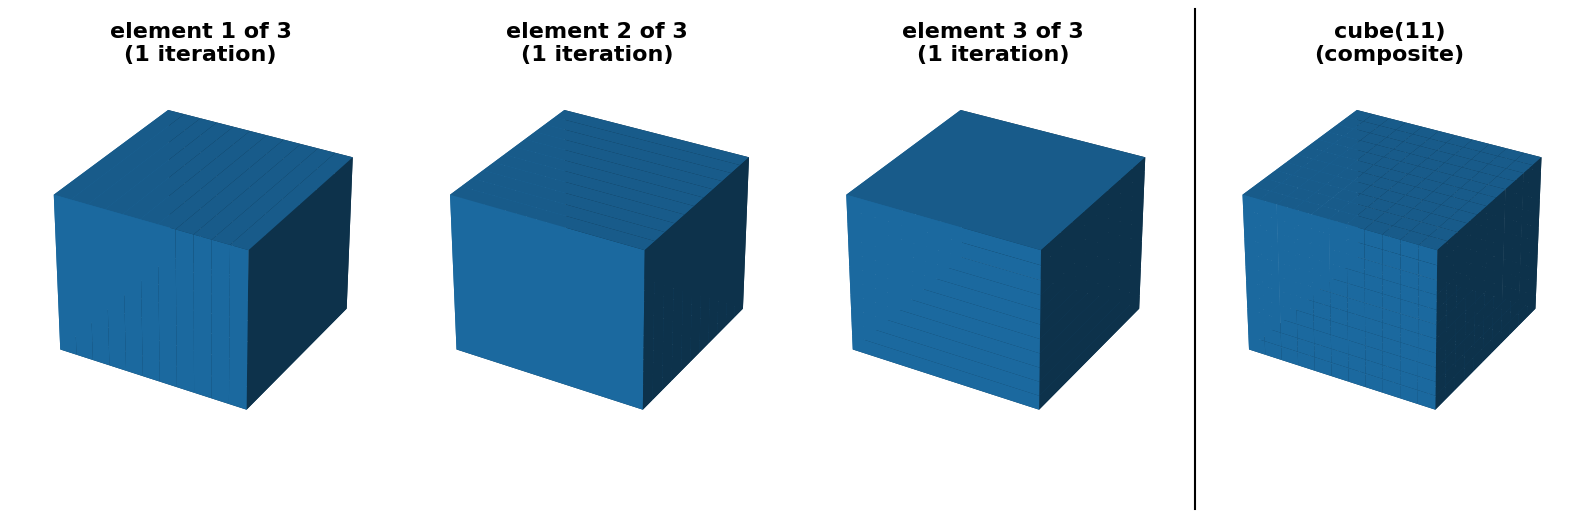

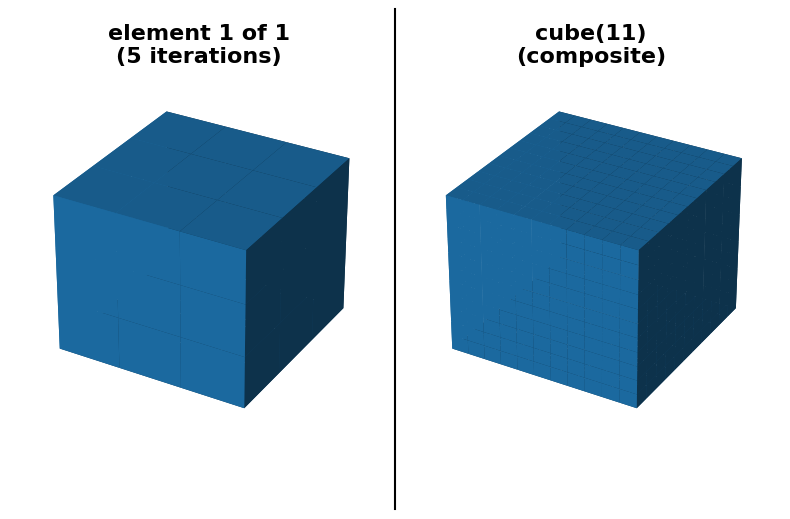

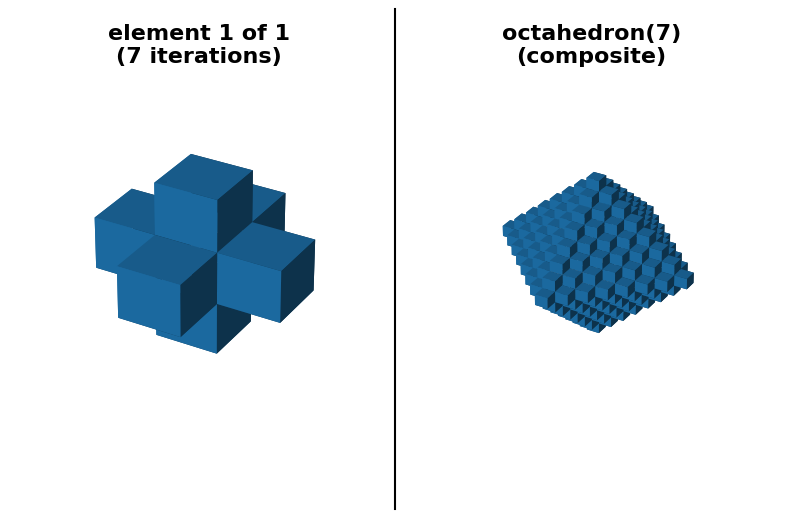

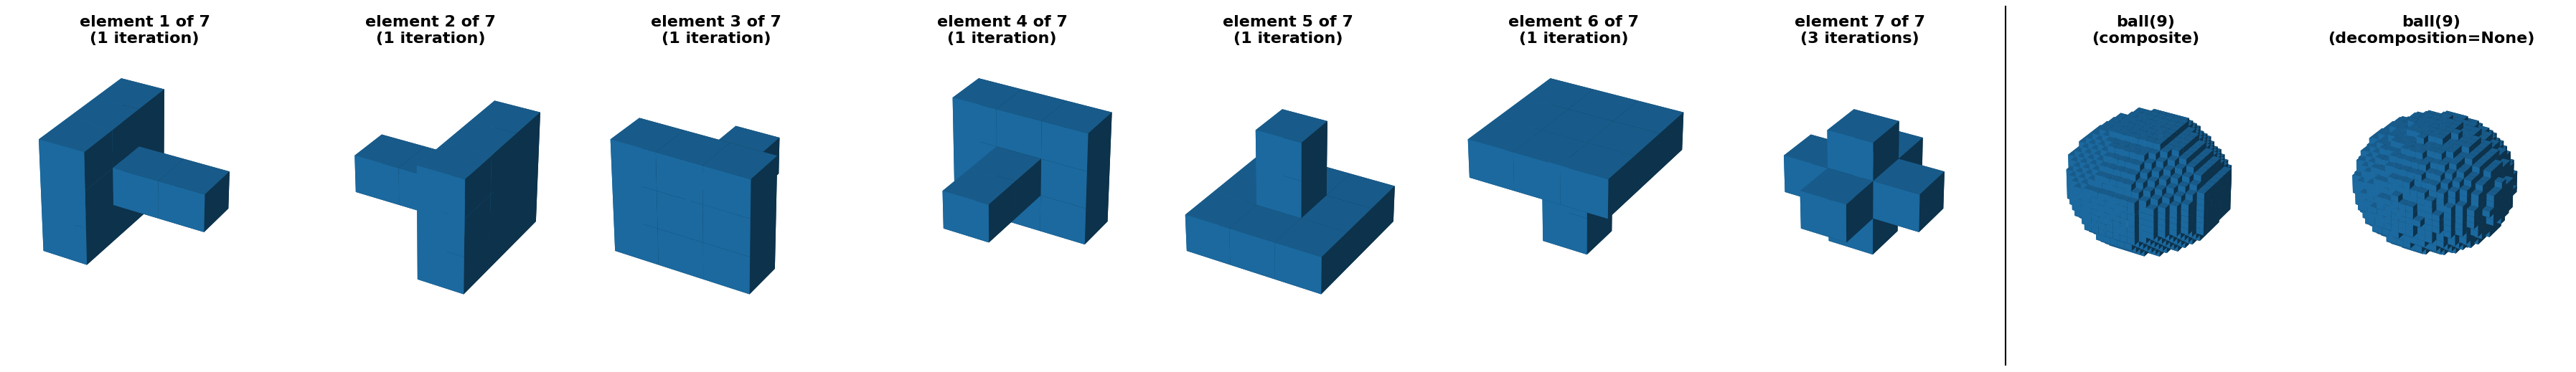

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

from skimage.morphology import (
    ball,
    cube,
    diamond,
    disk,
    ellipse,
    octagon,
    octahedron,
    rectangle,
    square,
)
from skimage.morphology.footprints import footprint_from_sequence


# Generate 2D and 3D structuring elements.
footprint_dict = {
    "square(11) (separable)": (
        square(11, decomposition=None),
        square(11, decomposition="separable"),
    ),
    "square(11) (sequence)": (
        square(11, decomposition=None),
        square(11, decomposition="sequence"),
    ),
    "rectangle(7, 11) (separable)": (
        rectangle(7, 11, decomposition=None),
        rectangle(7, 11, decomposition="separable"),
    ),
    "rectangle(7, 11) (sequence)": (
        rectangle(7, 11, decomposition=None),
        rectangle(7, 11, decomposition="sequence"),
    ),
    "diamond(5) (sequence)": (
        diamond(5, decomposition=None),
        diamond(5, decomposition="sequence"),
    ),
    "disk(7, strict_radius=False) (sequence)": (
        disk(7, strict_radius=False, decomposition=None),
        disk(7, strict_radius=False, decomposition="sequence"),
    ),
    "disk(7, strict_radius=True) (crosses)": (
        disk(7, strict_radius=True, decomposition=None),
        disk(7, strict_radius=True, decomposition="crosses"),
    ),
    "ellipse(4, 9) (crosses)": (
        ellipse(4, 9, decomposition=None),
        ellipse(4, 9, decomposition="crosses"),
    ),
    "disk(20) (sequence)": (
        disk(20, strict_radius=False, decomposition=None),
        disk(20, strict_radius=False, decomposition="sequence"),
    ),
    "octagon(7, 4) (sequence)": (
        octagon(7, 4, decomposition=None),
        octagon(7, 4, decomposition="sequence"),
    ),
    "cube(11) (separable)": (
        cube(11, decomposition=None),
        cube(11, decomposition="separable"),
    ),
    "cube(11) (sequence)": (
        cube(11, decomposition=None),
        cube(11, decomposition="sequence"),
    ),
    "octahedron(7) (sequence)": (
        octahedron(7, decomposition=None),
        octahedron(7, decomposition="sequence"),
    ),
    "ball(9) (sequence)": (
        ball(9, strict_radius=False, decomposition=None),
        ball(9, strict_radius=False, decomposition="sequence"),
    ),
}

# Visualize the elements

# binary white / blue colormap
cmap = colors.ListedColormap(['white', (0.1216, 0.4706, 0.70588)])

fontdict = dict(fontsize=16, fontweight='bold')
for title, (footprint, footprint_sequence) in footprint_dict.items():
    ndim = footprint.ndim
    num_seq = len(footprint_sequence)
    approximate_decomposition = 'ball' in title or 'disk' in title or 'ellipse' in title
    if approximate_decomposition:
        # Two extra plot in approximate cases to show both:
        # 1.) decomposition=None idea footprint
        # 2.) actual composite footprint corresponding to the sequence
        num_subplots = num_seq + 2
    else:
        # composite and decomposition=None are identical so only 1 extra plot
        num_subplots = num_seq + 1
    fig = plt.figure(figsize=(4 * num_subplots, 5))
    if ndim == 2:
        ax = fig.add_subplot(1, num_subplots, num_subplots)
        ax.imshow(footprint, cmap=cmap, vmin=0, vmax=1)
        if approximate_decomposition:
            ax2 = fig.add_subplot(1, num_subplots, num_subplots - 1)
            footprint_composite = footprint_from_sequence(footprint_sequence)
            ax2.imshow(footprint_composite, cmap=cmap, vmin=0, vmax=1)

    else:
        ax = fig.add_subplot(1, num_subplots, num_subplots, projection=Axes3D.name)
        ax.voxels(footprint, cmap=cmap)
        if approximate_decomposition:
            ax2 = fig.add_subplot(
                1, num_subplots, num_subplots - 1, projection=Axes3D.name
            )
            footprint_composite = footprint_from_sequence(footprint_sequence)
            ax2.voxels(footprint_composite, cmap=cmap)

    title1 = title.split(' (')[0]
    if approximate_decomposition:
        # plot decomposition=None on a separate axis from the composite
        title = title1 + '\n(decomposition=None)'
    else:
        # for exact cases composite and decomposition=None are identical
        title = title1 + '\n(composite)'
    ax.set_title(title, fontdict=fontdict)
    ax.set_axis_off()
    if approximate_decomposition:
        ax2.set_title(title1 + '\n(composite)', fontdict=fontdict)
        ax2.set_axis_off()

    for n, (fp, num_reps) in enumerate(footprint_sequence):
        npad = [((footprint.shape[d] - fp.shape[d]) // 2,) * 2 for d in range(ndim)]
        fp = np.pad(fp, npad, mode='constant')
        if ndim == 2:
            ax = fig.add_subplot(1, num_subplots, n + 1)
            ax.imshow(fp, cmap=cmap, vmin=0, vmax=1)
        else:
            ax = fig.add_subplot(1, num_subplots, n + 1, projection=Axes3D.name)
            ax.voxels(fp, cmap=cmap)
        title = f"element {n + 1} of {num_seq}\n({num_reps} iteration"
        title += "s)" if num_reps > 1 else ")"
        ax.set_title(title, fontdict=fontdict)
        ax.set_axis_off()
        ax.set_xlabel(f'num_reps = {num_reps}')
    fig.tight_layout()

    # draw a line separating the sequence elements from the composite
    line_pos = num_seq / num_subplots
    line = plt.Line2D([line_pos, line_pos], [0, 1], color="black")
    fig.add_artist(line)

plt.show()